In [1]:
import pandas as pd
import json

# JSON data
# Open the file with UTF-8 encoding
with open("data.json", "r", encoding="utf-8") as file:
    json_data = json.load(file)


# Convert JSON to DataFrame
df = pd.DataFrame(json_data)

# Remove duplicates based on the 'id' column
df_unique = df.drop_duplicates(subset="id")

print(df_unique.head())

# Optionally, you can save this unique data to a CSV file
df_unique.to_csv("final_data.csv", index=False)


                                                name                      id  \
0  Longchamp women's large tote bag, handbag, sho...  ZE94894E319EC24478F43Z   
1  4-Pair Non-slip Yoga Socks, Cotton Pilates Soc...  Z249EBB45716CC045A863Z   
2  Longchamp Women's Mini Makeup Bag, Handbag, Sh...  ZA63BF70F800CF9C3D86DZ   
3  8MM Yoga Mat with Carrying Strap Anti-Slip for...  Z24E1B5B4FDE8BB5C6111Z   
4  Longchamp Le Pliage Original Large Black Tote ...  Z806209A62BA1D05C47E5Z   

       brand   brand_id  price  sale_price  \
0  Longchamp  longchamp  399.9       161.7   
1      Lemon      lemon   56.0        39.2   
2  Longchamp  longchamp  399.9       147.5   
3   Bernessi   bernessi  165.0        69.9   
4  Longchamp  longchamp  165.0         NaN   

                                           image_key  
0  pzsku/ZE94894E319EC24478F43Z/45/_/1724907436/3...  
1  pzsku/Z249EBB45716CC045A863Z/45/_/1731035054/0...  
2  pzsku/ZA63BF70F800CF9C3D86DZ/45/_/1724907073/1...  
3  pzsku/Z24E1B5B4FDE8

In [2]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234 entries, 0 to 3415
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2234 non-null   object 
 1   id          2234 non-null   object 
 2   brand       2234 non-null   object 
 3   brand_id    2234 non-null   object 
 4   price       2234 non-null   float64
 5   sale_price  1048 non-null   float64
 6   image_key   2234 non-null   object 
dtypes: float64(2), object(5)
memory usage: 139.6+ KB


In [3]:
df_unique['sale_price'] = df_unique['sale_price'].fillna(df_unique['price'])

# Display the updated DataFrame
df.head()

C:\Users\saura\AppData\Local\Temp\ipykernel_12420\3511712823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['sale_price'] = df_unique['sale_price'].fillna(df_unique['price'])


name                      id  \
0  Longchamp women's large tote bag, handbag, sho...  ZE94894E319EC24478F43Z   
1  4-Pair Non-slip Yoga Socks, Cotton Pilates Soc...  Z249EBB45716CC045A863Z   
2  Longchamp Women's Mini Makeup Bag, Handbag, Sh...  ZA63BF70F800CF9C3D86DZ   
3  8MM Yoga Mat with Carrying Strap Anti-Slip for...  Z24E1B5B4FDE8BB5C6111Z   
4  Longchamp Le Pliage Original Large Black Tote ...  Z806209A62BA1D05C47E5Z   

       brand   brand_id  price  sale_price  \
0  Longchamp  longchamp  399.9       161.7   
1      Lemon      lemon   56.0        39.2   
2  Longchamp  longchamp  399.9       147.5   
3   Bernessi   bernessi  165.0        69.9   
4  Longchamp  longchamp  165.0         NaN   

                                           image_key  
0  pzsku/ZE94894E319EC24478F43Z/45/_/1724907436/3...  
1  pzsku/Z249EBB45716CC045A863Z/45/_/1731035054/0...  
2  pzsku/ZA63BF70F800CF9C3D86DZ/45/_/1724907073/1...  
3  pzsku/Z24E1B5B4FDE8BB5C6111Z/45/_/1696545863/4...  
4  pzsku/Z806209A62BA1D05C47E5Z/45/_/1731037357/b...

In [4]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234 entries, 0 to 3415
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2234 non-null   object 
 1   id          2234 non-null   object 
 2   brand       2234 non-null   object 
 3   brand_id    2234 non-null   object 
 4   price       2234 non-null   float64
 5   sale_price  2234 non-null   float64
 6   image_key   2234 non-null   object 
dtypes: float64(2), object(5)
memory usage: 139.6+ KB


In [5]:

df_unique.to_csv('final_data.csv', index=False)

In [6]:
# Enable interactive mode 
%matplotlib widget


import pandas as pd
import matplotlib.pyplot as plt


# Load the CSV file containing the data
file_path = "final_data.csv"
data = pd.read_csv(file_path)

# Ensure proper numeric data types for calculations
data['sale_price'] = pd.to_numeric(data['sale_price'], errors='coerce')

# Most expensive product by sale_price
most_expensive = data.loc[data['sale_price'].idxmax()]

# Cheapest product by sale_price
cheapest = data.loc[data['sale_price'].idxmin()]

# Number of products from each brand
brand_counts = data['brand'].value_counts()

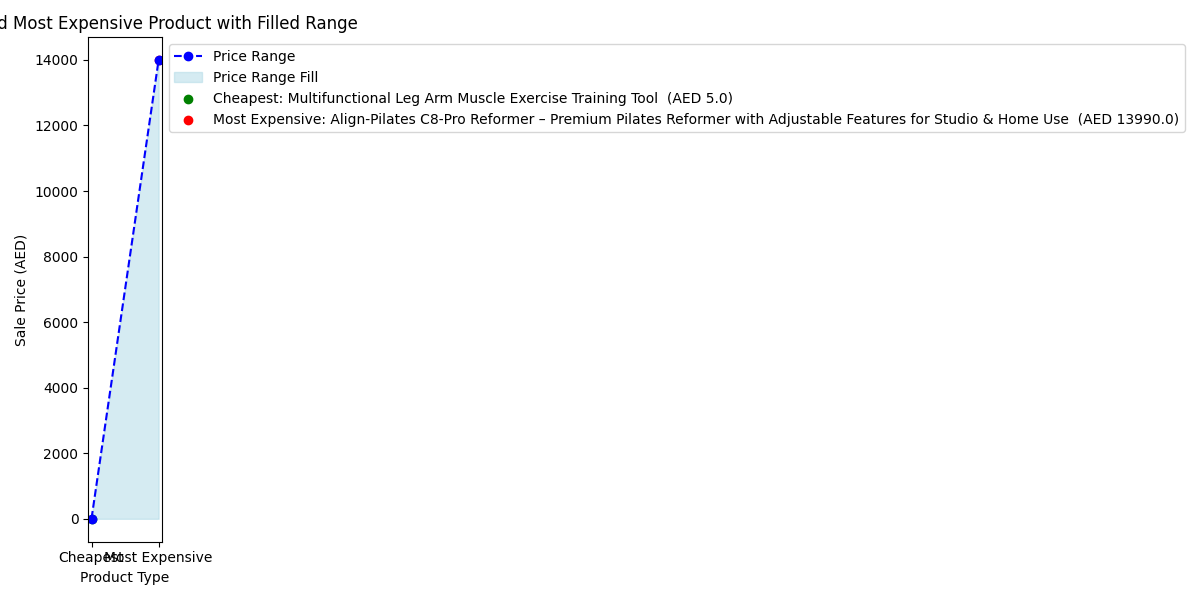

In [7]:
import numpy as np

# Generate 100 points between the sale prices of the cheapest and most expensive products
prices = np.linspace(cheapest['sale_price'], most_expensive['sale_price'], 100)

# Create a filled line graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line connecting the points
ax.plot(
    ["Cheapest", "Most Expensive"],
    [cheapest['sale_price'], most_expensive['sale_price']],
    linestyle='--', color='blue', marker='o', label='Price Range'
)

# Fill the area between the points
ax.fill_between(
    np.linspace(0, 1, 100), prices, color='lightblue', alpha=0.5,
    label='Price Range Fill'
)

# Add labels for min and max points
ax.scatter("Cheapest", cheapest['sale_price'], color='green', label=f"Cheapest: {cheapest['name']} (AED {cheapest['sale_price']})")
ax.scatter("Most Expensive", most_expensive['sale_price'], color='red', label=f"Most Expensive: {most_expensive['name']} (AED {most_expensive['sale_price']})")

# Add titles and labels
ax.set_title('Cheapest and Most Expensive Product with Filled Range')
ax.set_ylabel('Sale Price (AED)')
ax.set_xlabel('Product Type')

# Add a legend for clarity
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [8]:
# 2. Number of products from each brand
plt.figure(figsize=(100, 60))
brand_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Products from Each Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# 3. Candlestick graph for min and max sale prices per brand
price_summary = data.groupby('brand').agg({'sale_price': ['min', 'max']})
plt.figure(figsize=(100, 60))
for idx, row in price_summary.iterrows():
    plt.plot([idx, idx], [row['sale_price']['min'], row['sale_price']['max']], color='black', linewidth=2)
    plt.scatter([idx], [row['sale_price']['min']], color='blue', label='Min Price' if idx == price_summary.index[0] else "")
    plt.scatter([idx], [row['sale_price']['max']], color='red', label='Max Price' if idx == price_summary.index[0] else "")

plt.title('Brand-wise Candlestick Graph (Min and Max Sale Prices)')
plt.xlabel('Brand')
plt.ylabel('Sale Price (AED)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()